# Roller Coasters

## Objective
The goal of this project is to explore a roller coaster datsaset and to determine if machine learning can be applied to make predictions about variables.

The dataset 'roller_coasters.csv' was provided by Codecademy.

## Data Exploration

### Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Load Dataset

#### roller_coasters.csv

In [2]:
roller_coasters = pd.read_csv('roller_coasters.csv')
roller_coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


### Variables

#### roller_coasters:

**name**: name of roller coaster<br>
**material_type**: track material<br>
**seating_type**: style of passenger seating in train<br>
**speed**: roller coaster speed (kph)<br>
**height**: roller coaster height (m)<br>
**length**: track length (m)<br>
**num_inversions**: number of track inversions<br>
**manufacturer**: roller coaster manufacturer<br>
**park**: roller coaster location park name<br>
**status**: operating status of roller coaster<br>

In [3]:
roller_coasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2799 non-null   object 
 1   material_type   2802 non-null   object 
 2   seating_type    2802 non-null   object 
 3   speed           1478 non-null   float64
 4   height          1667 non-null   float64
 5   length          1675 non-null   float64
 6   num_inversions  2405 non-null   float64
 7   manufacturer    2802 non-null   object 
 8   park            2802 non-null   object 
 9   status          2802 non-null   object 
dtypes: float64(4), object(6)
memory usage: 219.0+ KB


### Numerical Variables


**Clean Up**<br>
The original returned maximum height was 902m, which belonged to the Mighty Mini Mega coaster. A fact check showed that the true height of this coaster is 9m. The datapoint was corrected.

It was also determined that Velociraptor height and length values are mixed up. The height should be 20m and the length should be 200m. The datapoint was corrected.

In [4]:
roller_coasters.height.replace(902.0, 9.0, inplace=True)
roller_coasters.height.replace(200.0, 20.0, inplace=True)
roller_coasters.length.replace(20.0, 200, inplace=True)

In [5]:
roller_coasters.describe()

,speed,height,length,num_inversions
count,1478.000000,1667.000000,1675.000000,2405.000000
mean,70.102842,25.546491,606.254925,0.809563
std,28.338394,16.941343,393.704999,1.652254
min,0.000000,0.000000,-1.000000,0.000000
25%,47.000000,13.000000,335.000000,0.000000
50%,72.000000,23.000000,500.000000,0.000000
75%,88.000000,35.000000,839.000000,1.000000
max,240.000000,139.000000,2920.000000,14.000000


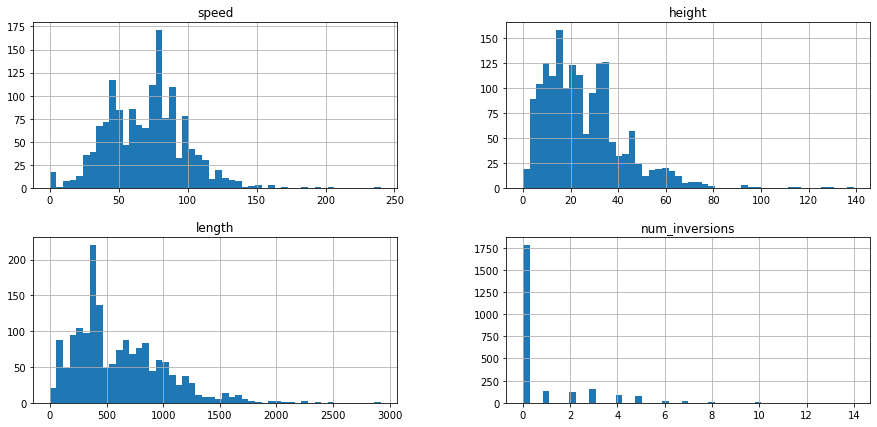

In [6]:
roller_coasters.hist(bins=50, figsize=(15,7))
plt.show()

### Categorical Variables

#### material_type
The majority of the roller coasters in the dataset are steel.

<AxesSubplot:xlabel='count', ylabel='material_type'>

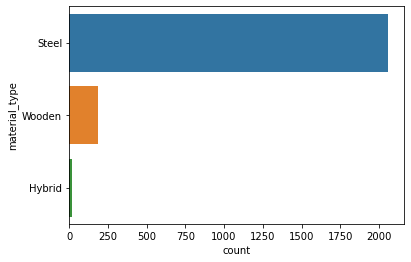

In [10]:
sns.countplot(data=roller_coasters[roller_coasters.material_type != 'na'], y='material_type')

#### seating_type
The majority of roller coasters in the dataset have a sit-down seating type.

<AxesSubplot:xlabel='count', ylabel='seating_type'>

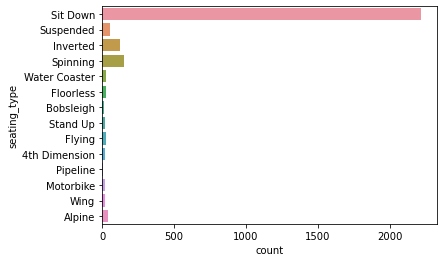

In [11]:
sns.countplot(data=roller_coasters[roller_coasters.seating_type != 'na'], y='seating_type')

#### manufacturer
There are five manufacturers listed in the dataset. Vekoma is the manufacturer of the majority of the roller coasters. Many of the roller coasters are missing data for this variable.

In [12]:
roller_coasters.manufacturer.value_counts(ascending=False).drop('na').head()

Vekoma      297
Zamperla    160
Intamin     152
Zierer      140
Pinfari     134
Name: manufacturer, dtype: int64

#### park
There are 718 different parks with roller coasters in the dataset. The top five parks with the most roller coasters are listed below.

In [13]:
roller_coasters.park.nunique()

718

In [14]:
roller_coasters.park.value_counts(ascending=False).head()

Foire                       121
Six Flags Magic Mountain     24
Kings Island                 23
Cedar Point                  22
Carowinds                    18
Name: park, dtype: int64

### Relationships
The pair plots below show relationships between the following variables:
- height and speed
- height and length
- speed and length

array([[<AxesSubplot:xlabel='speed', ylabel='speed'>,
        <AxesSubplot:xlabel='height', ylabel='speed'>,
        <AxesSubplot:xlabel='length', ylabel='speed'>,
        <AxesSubplot:xlabel='num_inversions', ylabel='speed'>],
       [<AxesSubplot:xlabel='speed', ylabel='height'>,
        <AxesSubplot:xlabel='height', ylabel='height'>,
        <AxesSubplot:xlabel='length', ylabel='height'>,
        <AxesSubplot:xlabel='num_inversions', ylabel='height'>],
       [<AxesSubplot:xlabel='speed', ylabel='length'>,
        <AxesSubplot:xlabel='height', ylabel='length'>,
        <AxesSubplot:xlabel='length', ylabel='length'>,
        <AxesSubplot:xlabel='num_inversions', ylabel='length'>],
       [<AxesSubplot:xlabel='speed', ylabel='num_inversions'>,
        <AxesSubplot:xlabel='height', ylabel='num_inversions'>,
        <AxesSubplot:xlabel='length', ylabel='num_inversions'>,
        <AxesSubplot:xlabel='num_inversions', ylabel='num_inversions'>]],
      dtype=object)

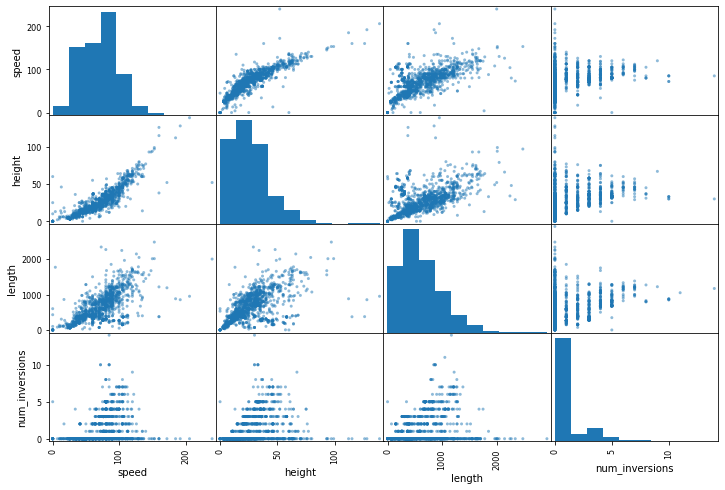

In [15]:
from pandas.plotting import scatter_matrix

scatter_matrix(roller_coasters, figsize=(12, 8))

The heat map below shows correlations between the variables.

In [16]:
roller_coasters['material_binary'] = roller_coasters['material_type'].apply(lambda x: 1 if x == "Steel" else 0)

<AxesSubplot:>

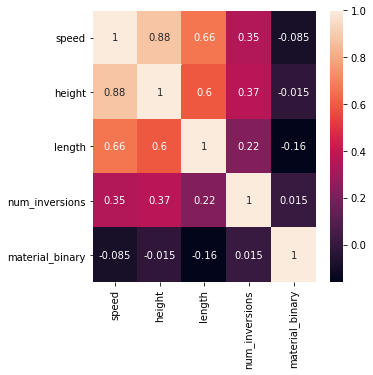

In [17]:
plt.figure(figsize = (5,5))
sns.heatmap(roller_coasters.corr(), annot=True)

## Predicting Speed
Height, length, and number of inversions seem to have a relationship with speed.

Can height, length, and the number of inversions predict the speed of a roller coaster?

### Multiple Linear Regression

In [18]:
mlr_df = roller_coasters[['speed', 'height', 'length', 'num_inversions']].dropna().reset_index(drop=True)
mlr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   speed           1282 non-null   float64
 1   height          1282 non-null   float64
 2   length          1282 non-null   float64
 3   num_inversions  1282 non-null   float64
dtypes: float64(4)
memory usage: 40.2 KB


In [19]:
mlr_features = mlr_df[['height', 'length', "num_inversions"]].copy()
scaler = preprocessing.StandardScaler().fit(mlr_features)
mlr_features = scaler.transform(mlr_features)
mlr_labels = mlr_df['speed']

In [20]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(mlr_features, mlr_labels, train_size=0.8, random_state=42)

In [21]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr_predictions = mlr.predict(x_test)

Text(0, 0.5, 'predicted speed (kph)')

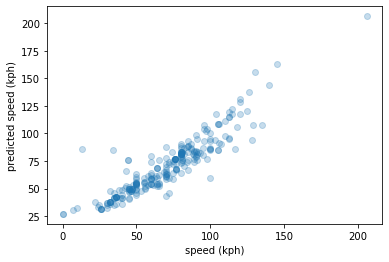

In [22]:
plt.scatter(y_test, mlr_predictions, alpha=0.25)
plt.xlabel('speed (kph)')
plt.ylabel('predicted speed (kph)')

In [23]:
from sklearn.metrics import mean_squared_error

mlr_rmse = mean_squared_error(y_test, mlr_predictions)
mlr_rmse = np.sqrt(mlr_rmse)
print("Error: ", mlr_rmse)
print("Accuracy: ", mlr.score(x_test, y_test))

Error:  11.64962983790342
Accuracy:  0.8355006483678344


Speed was predicted using multiple linear regression with an accuracy of almost 84% and an error of 11 kph.

## Predicting Inversions
It also looks like length, height, and speed may have a relationship to whether or not a roller coaster has inversions.

Can length, height, and speed predict if a roller coaster has inversions?

### K-Nearest Neighbors

#### Prepare Data

In [24]:
roller_coasters['inversions_binary'] = roller_coasters['num_inversions'].apply(lambda x: 1 if x > 0 else 0)

In [25]:
knn_df = roller_coasters[['speed', 'height', 'length', 'inversions_binary']].dropna().reset_index(drop=True)
knn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   speed              1331 non-null   float64
 1   height             1331 non-null   float64
 2   length             1331 non-null   float64
 3   inversions_binary  1331 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 41.7 KB


In [26]:
knn_features = knn_df[['speed', 'height', 'length']].copy()
knn_labels = knn_df['inversions_binary']

#### Prepare Training and Test Sets

In [27]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(knn_features, knn_labels, train_size=0.8, random_state=42)

#### Optimize K
The plot below shows that model accuracy decreases as the value of k (or number of neighbors) increases.

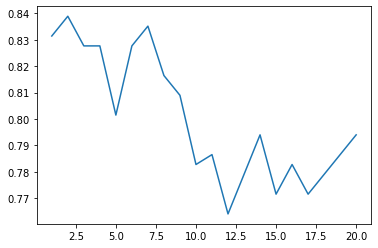

In [28]:
knn_accuracy = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn.predict(x_test)
    knn_accuracy.append(knn.score(x_test, y_test))

plt.plot(range(1,21), knn_accuracy)    

#### Fit The Model and Make Predictions
Based on the above plot, a k value of two neighbors was chosen for the model.

In [29]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

In [30]:
knn_rmse = mean_squared_error(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_rmse)
print("Error: ", knn_rmse)
print("Accuracy: ", knn.score(x_test, y_test))

Error:  0.401308720486581
Accuracy:  0.8389513108614233


The K-Nearest Neighbors model was able to predict if a roller coaster had inversions with an accuracy of almost 84%.

### Decision Tree
Another model that can be used for classification is the Decision Tree. 

#### Fit The Model and Make Predictions

In [31]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_predictions = tree.predict(x_test)

In [32]:
tree_rmse = mean_squared_error(y_test, tree_predictions)
tree_rmse = np.sqrt(tree_rmse)
print("Error: ", tree_rmse)
print("Accuracy: ", tree.score(x_test, y_test))

Error:  0.39661488976905146
Accuracy:  0.8426966292134831


The Decision Tree model was able to predict if a roller coaster had inversions with an accuracy of 84%. This result is the same as the K-Nearest Neighbor accuracy.

## Conclusion
In conclusion, the following predictions were made:
- **Speed** based on height, length, and number of inversions
    - Model: Mulitiple Linear Regression
- **Inversions** based on length, height, and speed
    - Models: K-Nearest Neighbors and Decision Tree
    
**Limitations:** It is important to remember that with such a small dataset, there is a lot of room for error in the predictions.